In [63]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 
import math

MAZE_FILE_NAME = "../Maze_5.png"
ROBOT_FILE_NAME = "../Robot_5.png"
IMAGE_LADYBUG_FILE_NAME = "../Ladybug_small.png"
MAP_FILE_NAME = "../MapBuild.txt"

kernel_closing = np.ones((10,10), np.uint8)
kernel = np.ones((3,3), np.uint8)

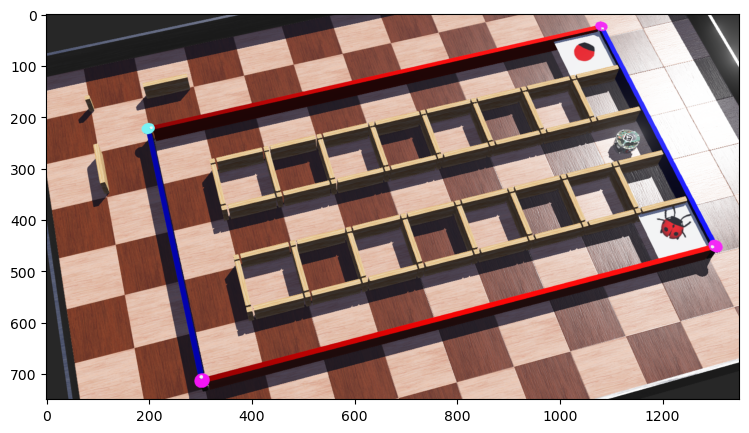

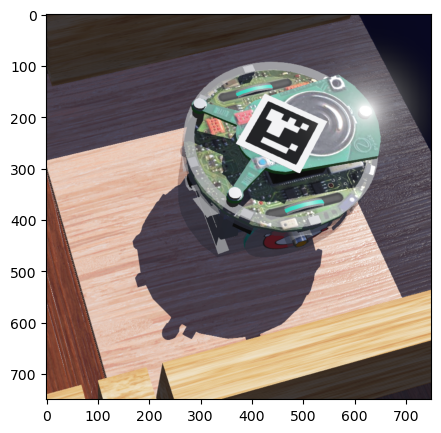

In [64]:
#Task 3.1.Read in an image and display it in RGB mode
maze = cv2.imread(MAZE_FILE_NAME)
maze_rgb = cv2.cvtColor(maze, cv2.COLOR_BGR2RGB) 
plt.figure(figsize = (9, 5))
plt.imshow(maze_rgb)
plt.show()

robot = cv2.imread(ROBOT_FILE_NAME)
robot_rgb = cv2.cvtColor(robot, cv2.COLOR_BGR2RGB) 
plt.figure(figsize = (9, 5))
plt.imshow(robot_rgb)
plt.show()

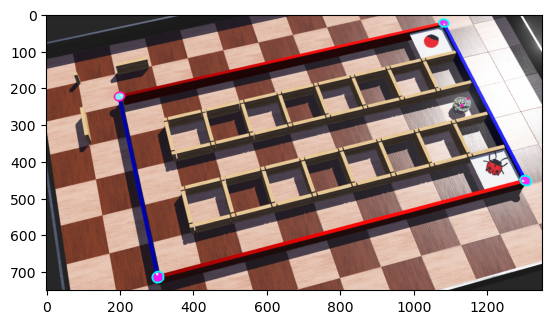

In [65]:
#Task 3.2.find the four ordered cornerstones of the maze
def nothing(x): pass

lowerPink = np.array([125, 70, 235])
upperPink = np.array([150,255,255])
lowerCyan = np.array([80, 5, 245])
upperCyan = np.array([119,255,255])
maze_copy = maze.copy() 
hsv = cv2.cvtColor(maze_copy, cv2.COLOR_BGR2HSV)
# plt.imshow(hsv)
# plt.show()
maskPink = cv2.inRange(hsv, lowerPink, upperPink)
maskCyan = cv2.inRange(hsv, lowerCyan, upperCyan)
pink = (255,192,203)
cyan = (0,255,255)
resultPink = cv2.bitwise_and(maze_copy, pink, mask=maskPink)
resultCyan = cv2.bitwise_and(maze_copy, cyan, mask=maskCyan)
resultPink_rgb = cv2.cvtColor(resultPink, cv2.COLOR_BGR2RGB)
resultCyan_rgb = cv2.cvtColor(resultCyan, cv2.COLOR_BGR2RGB)
# plt.imshow(resultPink_rgb)
# plt.show()
# plt.imshow(resultCyan_rgb)
# plt.show()

resultPink_gray = cv2.cvtColor(resultPink, cv2.COLOR_BGR2GRAY)
resultPink_gray = cv2.morphologyEx(resultPink_gray, cv2.MORPH_CLOSE, kernel_closing)
resultPink_gray = cv2.dilate(resultPink_gray, kernel, iterations = 1)
edgesPink = cv2.Canny(resultPink_gray, threshold1 = 50, threshold2 = 100, apertureSize = 3)
# plt.imshow(edgesPink, cmap = 'gray')
# plt.show()

resultCyan_gray = cv2.cvtColor(resultCyan, cv2.COLOR_BGR2GRAY)
resultCyan_gray = cv2.morphologyEx(resultCyan_gray, cv2.MORPH_CLOSE, kernel_closing)
resultCyan_gray = cv2.dilate(resultCyan_gray, kernel, iterations = 1)
edgesCyan = cv2.Canny(resultCyan_gray, threshold1 = 50, threshold2 = 100, apertureSize = 3)
# plt.imshow(edgesCyan, cmap = 'gray')
# plt.show()

imgPink, contoursPink, hierarchyPink = cv2.findContours(edgesPink, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# print(contoursPink)
cv2.drawContours(maze_copy, contoursPink, -1, (255,255,0), 3)

imgCyan, contoursCyan, hierarchyCyan = cv2.findContours(edgesCyan, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(maze_copy, contoursCyan, -1, (178,25,255), 3)
maze_rgb = cv2.cvtColor(maze_copy, cv2.COLOR_BGR2RGB)
plt.imshow(maze_rgb)
plt.show()

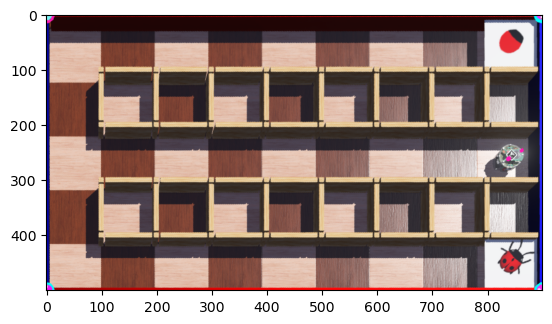

In [66]:
# Task 3.3.Perspective transform the maze from the original image to a rectangle image

CornerX = [1,1,2,3]
CornerY = [1,1,2,3]
CyanStoneinZoneA = 0;
# Top Left Corner[0]
# Top Right Corner[1]
# Bottom Left Corner[2]
# Bottom right Corner[3]

for i, cnt in enumerate(contoursCyan):
    m = cv2.moments(cnt)
    CornerX[0] = int(m["m10"] / m["m00"])
    CornerY[0] = int(m["m01"] / m["m00"])

for i, cnt in enumerate(contoursPink):
    m = cv2.moments(cnt)
    cX = int(m["m10"] / m["m00"])
    cY = int(m["m01"] / m["m00"])
    
    if CornerX[0] >= 1012.5:
#         print('Cyan Stone is in Zone D')
        if cX >= 1012.5:
            CornerX[2] = cX;
            CornerY[2] = cY;
        else :
            if cY < 375:
                CornerX[3] = cX;
                CornerY[3] = cY;
            else :
                CornerX[1] = cX;
                CornerY[1] = cY;
    else :
        CyanStoneinZoneA = 1;
#         print('Cyan Stone is in Zone A')
        if cX < 1012.5:
            CornerX[2] = cX;
            CornerY[2] = cY;
        else :
            if cY < 375:
                CornerX[1] = cX;
                CornerY[1] = cY;
            else : 
                CornerX[3] = cX;
                CornerY[3] = cY;

# for i in range(0,4):
#     print(CornerX[i])
#     print(CornerY[i])

# Perform Perspective transform
pts1 = np.float32([[CornerX[0],CornerY[0]],[CornerX[1],CornerY[1]],[CornerX[2],CornerY[2]],[CornerX[3],CornerY[3]]]) 
pts2 = np.float32([[0,0],[900,0],[0,500],[900,500]]) 

H = cv2.getPerspectiveTransform(pts1,pts2) # homography matrix

dst = cv2.warpPerspective(maze_rgb, H, (900,500))
plt.imshow(dst)
plt.show()


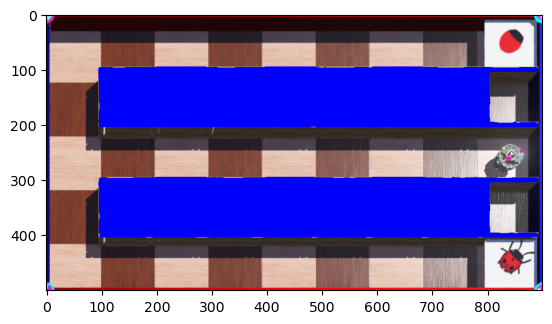

6


In [67]:
# Task 3.4. Detect all the internal walls



lowerWall = np.array([15,75,225])
upperWall = np.array([20,120,240])
dst_copy = dst.copy()
hsv = cv2.cvtColor(dst_copy, cv2.COLOR_RGB2HSV)

maskWall = cv2.inRange(hsv, lowerWall, upperWall)
blue = (255,0,0)
resultWall = cv2.bitwise_and(dst_copy, blue, mask=maskWall)
resultWall_rgb = cv2.cvtColor(resultWall, cv2.COLOR_BGR2RGB)
# plt.imshow(resultWall_rgb)
# plt.show()    

closing = cv2.morphologyEx(resultWall, cv2.MORPH_CLOSE, kernel_closing)
erosion = cv2.erode(closing, kernel, iterations = 2)
dilation = cv2.dilate(erosion, kernel, iterations = 2)
# plt.imshow(erosion)
# plt.show()
# plt.imshow(dilation)
# plt.show()

resultWall_gray = cv2.cvtColor(dilation, cv2.COLOR_BGR2GRAY)
edgesWall = cv2.Canny(resultWall_gray, threshold1 = 50, threshold2 = 100, apertureSize = 3)
# plt.imshow(edgesWall, cmap = 'gray')
# plt.show()

imgWall, contoursWall, hierarchyWall = cv2.findContours(edgesWall, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
Wall = cv2.drawContours(dst_copy, contoursWall, -1, (0, 0, 255), -1)
plt.imshow(Wall)
plt.show()

# Calculate Horizontal&Vertical Wall Matrix
Hwall = np.ones((6,9), np.int8)
Vwall = np.ones((5,10), np.int8)
print(len(Hwall))

row, col = np.where(maskWall == 255)

# Horizontal wall
for i in range(1,5):
    for j in range(0,9):
        row_ = i*100
        col_ = j*100+50
        wall_dimension = np.where((row < row_+5) & (row > row_-5) & (col < col_+25) & (col > col_-25))
        if (len(wall_dimension[0]) < 50) :
            Hwall[i][j] = 0
# Vertical wall            
for i in range(0,5):
    for j in range(1,9):
        row_ = i*100+50
        col_ = j*100
        wall_dimension = np.where((row < row_+25) & (row > row_-25) & (col < col_+5) & (col > col_-5))
        if (len(wall_dimension[0]) < 50) :
            Vwall[i][j] = 0
# print(Hwall)
# print(Vwall)

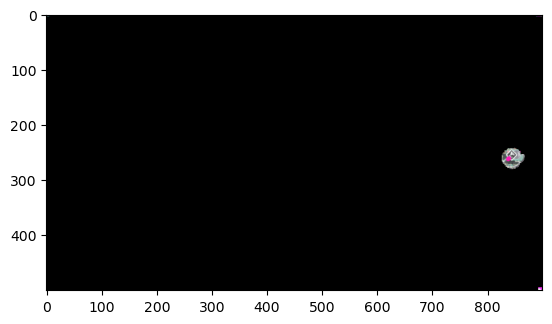

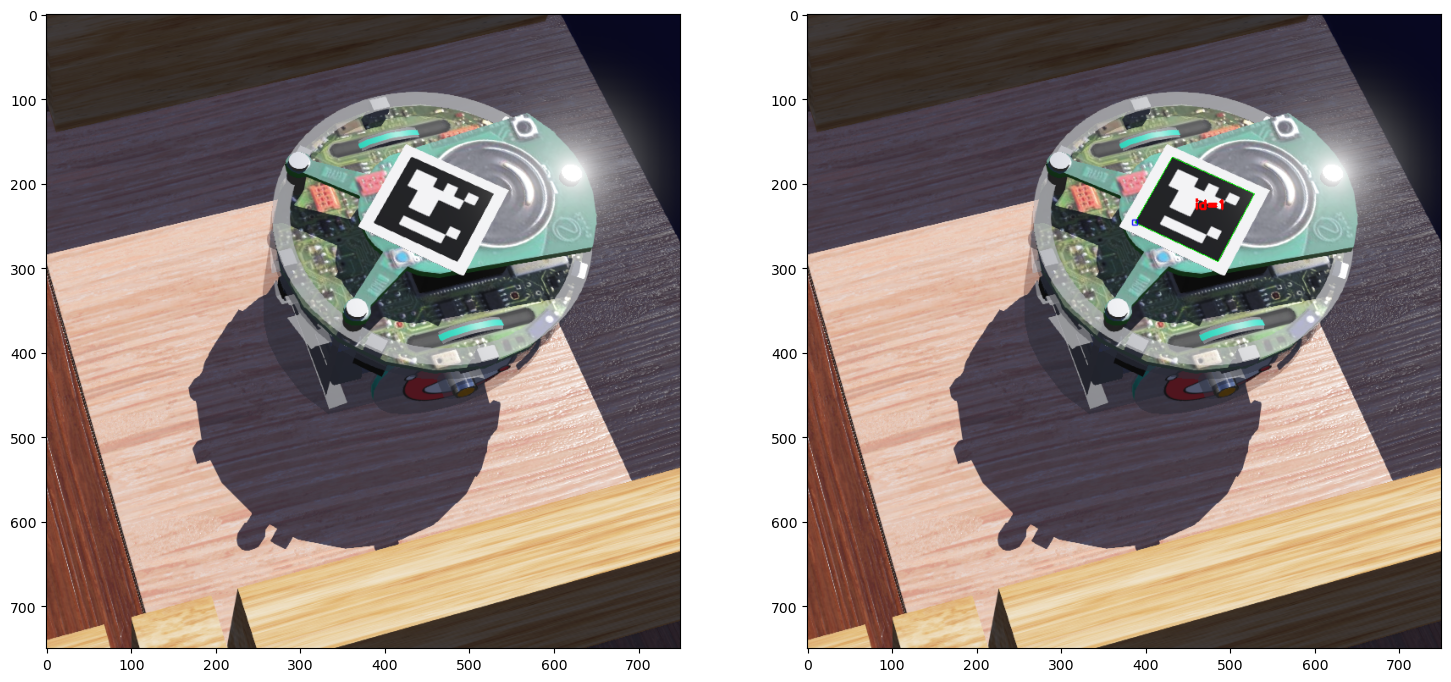

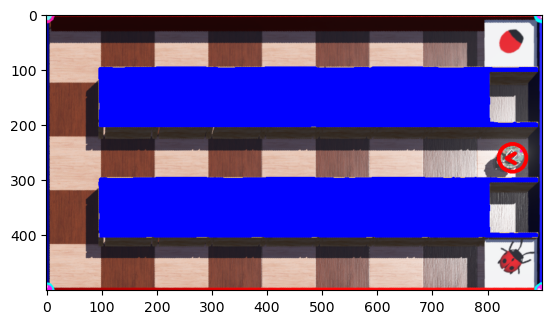

In [70]:
# Task 3.5. Detect the location and heading of the robot

# Detect Robot Location
dst_copy = Wall.copy()
hsv = cv2.cvtColor(dst_copy, cv2.COLOR_RGB2HSV)
lowerRobot = np.array([30,5,150])
upperRobot = np.array([110,130,200])
maskRobot = cv2.inRange(hsv, lowerRobot, upperRobot)
# plt.imshow(maskRobot)
# plt.show()
maskRobot = cv2.morphologyEx(maskRobot, cv2.MORPH_CLOSE, kernel_closing, iterations=3)
maskRobot = cv2.erode(maskRobot, kernel, iterations = 1)
# plt.imshow(maskRobot)
# plt.show()
robotImg = cv2.bitwise_and(dst_copy, dst_copy, mask=maskRobot)
plt.imshow(robotImg)
plt.show()
imgRobot, contoursRobot, hierarchyRobot = cv2.findContours(maskRobot, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# Finding the largest contour in case of there is noise left after masking
RobotCont = 0
MaxArea = 0
for cnt in contoursRobot:
    area = cv2.contourArea(cnt)
    if area > MaxArea:
        MaxArea = area
        RobotCont = cnt

# Calculate robot cordinate in the image
mRobot = cv2.moments(RobotCont)
XRobot = int(mRobot['m10'] / mRobot['m00'])
YRobot = int(mRobot['m01'] / mRobot['m00'])

# Detect robot cordinate in the maze
robot_initial_col = math.floor(XRobot/100)
robot_initial_row = math.floor(YRobot/100)

# Draw a red circle around the robot
cv2.circle(dst_copy, (XRobot,YRobot), 25, (255, 0,0), 5)

# Detect Robot Heading
# Reference to https://github.com/drliaowu/MTRN4110_21T2_Lecture_Vision_II/blob/master/Programs/MTRN4110_Lecture_Vision_II.ipynb

# Detect ArUco markers
# image is loaded with imread command 
img_bgr = cv2.imread(ROBOT_FILE_NAME)
img_rgb_origin = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)
img_rgb = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)

# Load the predefined dictionary
dictionary = cv2.aruco.Dictionary_get(cv2.aruco.DICT_6X6_250)

# Initialize the detector parameters using default values
parameters =  cv2.aruco.DetectorParameters_create()

# Detect the markers in the image
markerCorners, markerIds, rejectedCandidates = cv2.aruco.detectMarkers(img_rgb, dictionary, parameters=parameters)

img_rgb = cv2.aruco.drawDetectedMarkers(img_rgb, markerCorners, markerIds)

#plot the image
fig, (ax1, ax2) = plt.subplots(figsize = (18, 10), ncols = 2)
ax1.imshow(img_rgb_origin)
ax2.imshow(img_rgb)
plt.show()

# Get coordinate of 4 marker corners in a array and compare the Top Left's coordinate
# with others to determine robot heading
XmarkerCorner = [0,0,0,0]
YmarkerCorner = [0,0,0,0]

for i in range(0,4):
    XmarkerCorner[i] = markerCorners[0][0][i][0]
    YmarkerCorner[i] = markerCorners[0][0][i][1]
    
XTopLeft = XmarkerCorner[0]
YTopLeft = YmarkerCorner[0]

if CyanStoneinZoneA == 1:
    if YTopLeft == min(YmarkerCorner):
        robot_initial_heading = 'N' 
        heading = '^'
        XRobot = XRobot - 10
        YRobot = YRobot + 5
    elif XTopLeft == max(XmarkerCorner):
        robot_initial_heading = 'E' 
        heading = '>'
        XRobot = XRobot - 10
        YRobot = YRobot + 10
    elif  YTopLeft == max(YmarkerCorner):
        robot_initial_heading = 'S' 
        heading = 'v'
        XRobot = XRobot - 10
        YRobot = YRobot + 10
    elif XTopLeft == min(XmarkerCorner):
        robot_initial_heading = 'W' 
        heading = '<'
        XRobot = XRobot - 15
        YRobot = YRobot + 10
else: 
    if YTopLeft == min(YmarkerCorner):
        robot_initial_heading = 'S' 
        heading = 'v'
        XRobot = XRobot - 10
        YRobot = YRobot + 10
    elif XTopLeft == max(XmarkerCorner):
        robot_initial_heading = 'W' 
        heading = '<'
        XRobot = XRobot - 15
        YRobot = YRobot + 10
    elif  YTopLeft == max(YmarkerCorner):
        robot_initial_heading = 'N' 
        heading = '^'
        XRobot = XRobot -10
        YRobot = YRobot +5
    elif XTopLeft == min(XmarkerCorner):
        robot_initial_heading = 'E' 
        heading = '>'
        XRobot = XRobot - 10
        YRobot = YRobot + 10
    
dst1 = cv2.putText(dst_copy,heading,(XRobot,YRobot), cv2.FONT_HERSHEY_SIMPLEX, 1,(255,0,0),5,cv2.LINE_AA)  
plt.imshow(dst1)
plt.show()

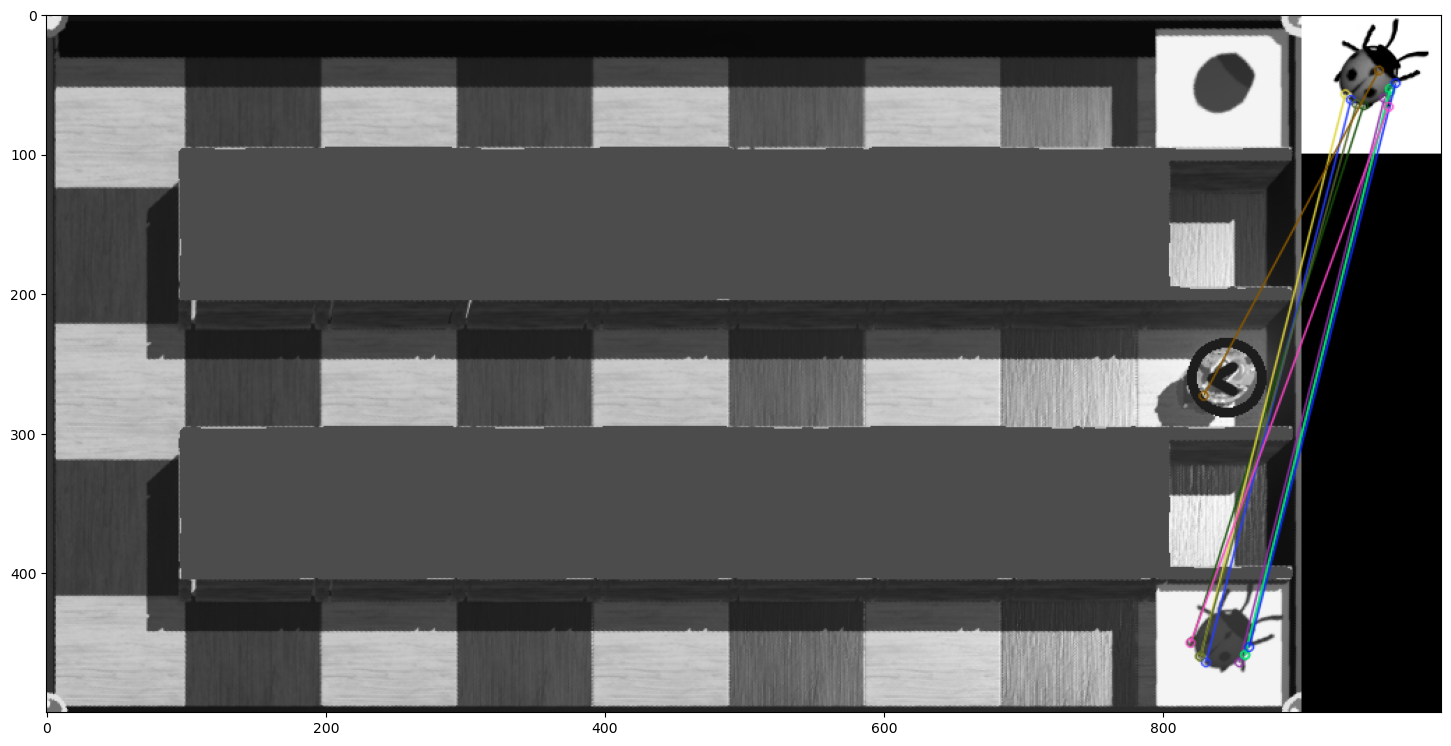

8
4


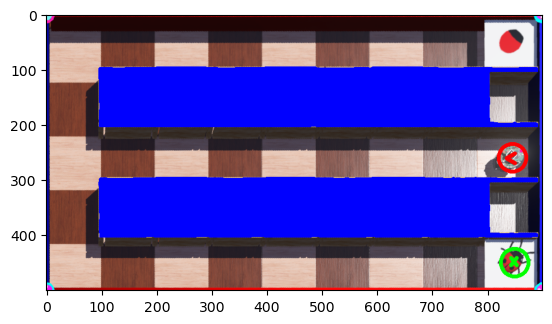

In [71]:
# Task 3.6. Detect the position of the true target

dst_copy = dst1.copy()

# Reference to https://github.com/drliaowu/MTRN4110_21T2_Lecture_Vision_II/blob/master/Programs/MTRN4110_Lecture_Vision_II.ipynb 
img1 = cv2.cvtColor(dst_copy, cv2.COLOR_BGR2GRAY)          # queryImage
img2 = cv2.imread(IMAGE_LADYBUG_FILE_NAME,cv2.IMREAD_GRAYSCALE)          # trainImage

# Initiate ORB detector
orb  = cv2.ORB_create()

# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.
img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches[:10], None, flags=2)

plt.figure(figsize = (18, 10))
plt.imshow(img3)
plt.show()

# Reference to https://stackoverflow.com/questions/30716610/how-to-get-pixel-coordinates-from-feature-matching-in-opencv-python
# Initialize lists
list_kp1 = []
list_kp2 = []

# For each match...
for mat in matches:

    # Get the matching keypoints for each of the images
    img1_idx = mat.queryIdx
    img2_idx = mat.trainIdx

    # x - columns
    # y - rows
    # Get the coordinates
    (x1, y1) = kp1[img1_idx].pt
    (x2, y2) = kp2[img2_idx].pt
    
    # Append to each list
    list_kp1.append((x1, y1))
    list_kp2.append((x2, y2))
# print(list_kp1)
target_cell_col = math.floor(list_kp1[0][0]/100)
target_cell_row = math.floor(list_kp1[0][1]/100)
print(target_cell_col)
print(target_cell_row)
cv2.circle(dst_copy, (target_cell_col*100+50,target_cell_row*100+50), 25, (0,255,0), 5)
cv2.putText(dst_copy,'x',(target_cell_col*100+40,target_cell_row*100+55), cv2.FONT_HERSHEY_SIMPLEX, 1,(0,255,0),5,cv2.LINE_AA)  
plt.imshow(dst_copy)
plt.show()

In [72]:
# Task 3.7. Generate a map and write it to a text file
MapFile = open(MAP_FILE_NAME, 'w')

for row in range(0, 6):
    #Print horizontal walls
    for col in range(0, 9):
        if Hwall[row, col] == 1:
            MapFile.write(" ---")
        else:
            MapFile.write("    ")
    MapFile.write(" \n")
    
    for col in range(0, 10):
        #print vertical walls, robot and target cell
        if row < 5:
            if Vwall[row, col] == 1:
                MapFile.write("|")
            else:
                MapFile.write(" ")

            if col < 9:
                if row == robot_initial_row and col == robot_initial_col:
                    MapFile.write(f" {heading} ")
                elif row == target_cell_row and col == target_cell_col:
                    MapFile.write(" x ")
                else:
                    MapFile.write("   ")                    
    MapFile.write("\n")
MapFile.close()